In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

%matplotlib inline 

# Part a)

In [2]:
def low_rank_approximation(X, rank):
    # YOUR CODE GOES HERE
    U, S, Vt = np.linalg.svd(X)
    S_hat = np.zeros((U.shape[1], Vt.shape[0]))
    #print(U.shape, S_hat.shape, Vt.shape)
    for i in range(rank):
        S_hat[i, i] = S[i]
    return U @ S_hat @ Vt

In [3]:
face = imread("./data/face.jpg")
rank_5 = low_rank_approximation(face, 5)
rank_20 = low_rank_approximation(face, 20)
rank_100 = low_rank_approximation(face, 100)

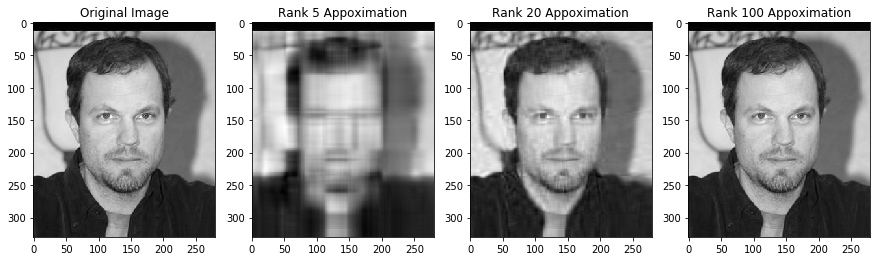

In [4]:
f, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 5))

ax[0].imshow(face, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(rank_5, cmap='gray')
ax[1].set_title("Rank 5 Appoximation")

ax[2].imshow(rank_20, cmap='gray')
ax[2].set_title("Rank 20 Appoximation")

ax[3].imshow(rank_100, cmap='gray')
ax[3].set_title("Rank 100 Appoximation");

# Part b)

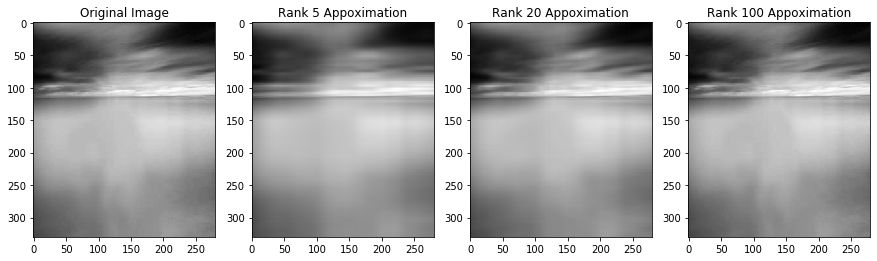

In [5]:
sky = imread("./data/sky.jpg")
rank_5 = low_rank_approximation(sky, 5)
rank_20 = low_rank_approximation(sky, 10)
rank_100 = low_rank_approximation(sky, 100)

f, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 5))

ax[0].imshow(sky, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(rank_5, cmap='gray')
ax[1].set_title("Rank 5 Appoximation")

ax[2].imshow(rank_20, cmap='gray')
ax[2].set_title("Rank 20 Appoximation")

ax[3].imshow(rank_100, cmap='gray')
ax[3].set_title("Rank 100 Appoximation");

# Part c)

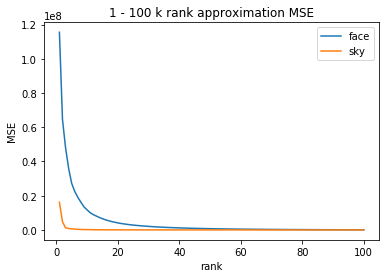

In [6]:
def mse(img1, img2):
    # YOUR CODE GOES HERE 
    return np.sum((img1 - img2) ** 2)

face_mse, sky_mse = [], []

for i in range(1, 101):
    face_rank = low_rank_approximation(face, i)
    face_mse.append(mse(face_rank, face))
    sky_rank = low_rank_approximation(sky, i)
    sky_mse.append(mse(sky_rank, sky))

#plt.figure(figsize=(10, 10))
plt.plot(range(1, 101), face_mse, label='face')
plt.plot(range(1, 101), sky_mse, label='sky')
plt.title("1 - 100 k rank approximation MSE")
plt.xlabel("rank")
plt.ylabel("MSE")
plt.legend(loc='best');

# Part D)

<font size=3.6> For face picture, I need rank 70+ to make the approximated picture undistinguishable from the orignal one, but only 30ish ranks needed for sky picture. <br>
    The reason behind this might be that the original sky picture is pretty low rank as well, hence only a small rank approximation is needed for a good approximatino. From part C, we can also tell that the MSE for sky image converge to 0 much faster than the face picture. 

In [7]:
def plot_compare(img, rank):
    img_rank = low_rank_approximation(img, rank)
    f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Original Image")

    ax[1].imshow(img_rank, cmap='gray')
    ax[1].set_title("Rank %d Appoximation" % rank);

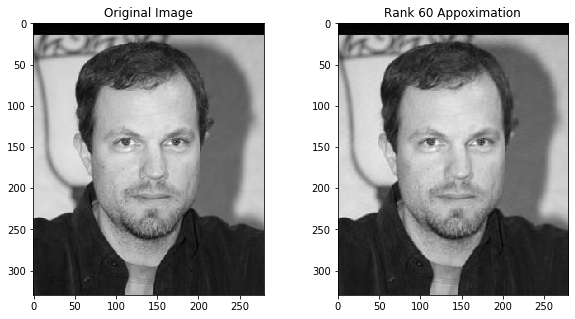

In [8]:
plot_compare(face, 60)

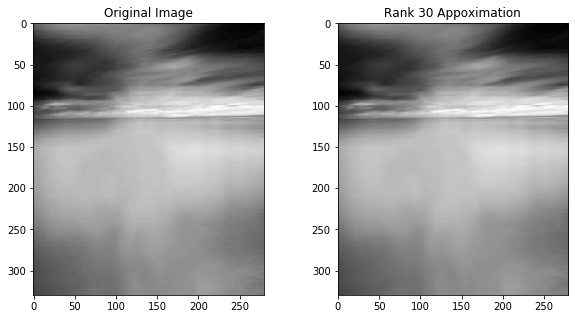

In [9]:
plot_compare(sky, 30)